# Champlin Smith Final Project - Credit Score Prediction

In [2]:
import pandas as pd


file_path = "C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC550 Data Mining\\project\\train.csv"
df = pd.read_csv(file_path, sep=',', encoding='ISO-8859-1')

print(df.head(10))

       ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation  Annual_Income  Monthly_In_hand_Salary  Num_Bank_Accounts  ...  \
0  Scientist       19114.12             1824.843333                  3  ...   
1  Scientist       19114.12                     NaN         

In [3]:
# Filter out invalid ages
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('float')
df = df[(df['Age'] >= 0) & (df['Age'] <= 115)]
print(df.head(10))

        ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh  23.0  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh  23.0  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh  23.0  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh  23.0  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh  23.0  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh  23.0  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN  23.0    #F%$D@*&8   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj  28.0  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj  28.0  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj  28.0  004-07-5839   

   Occupation  Annual_Income  Monthly_In_hand_Salary  Num_Bank_Accounts  ...  \
0   Scientist       19114.12             1824.843333                  3  ...   
1   Scientist       19114.12                   

In [4]:
# Dropping PII fields - not needed as we have a unique identifier to derive these fields if needed in future
df = df.drop(columns=['Name', 'SSN'])

In [5]:
# Clean the Annual Income column
df = df[~df['Annual_Income'].astype(str).str.endswith('_')]
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

In [6]:
# Get the Median Annual Income for the person's occupation, and then get the difference between their income and their occupation's median.
# This will show is where they are in the occupation's "Salary Band" and might give us info on if they are high performing or not which might impact credit score.
median_income_by_occ = df.groupby('Occupation')['Annual_Income'].median().rename('Median Occupation Income')
df = df.join(median_income_by_occ, on='Occupation')
df['Income vs Occupation Median'] = df['Annual_Income'] - df['Median Occupation Income']

print(df.head(10))

        ID Customer_ID     Month   Age Occupation  Annual_Income  \
0   0x1602   CUS_0xd40   January  23.0  Scientist       19114.12   
1   0x1603   CUS_0xd40  February  23.0  Scientist       19114.12   
3   0x1605   CUS_0xd40     April  23.0  Scientist       19114.12   
4   0x1606   CUS_0xd40       May  23.0  Scientist       19114.12   
5   0x1607   CUS_0xd40      June  23.0  Scientist       19114.12   
6   0x1608   CUS_0xd40      July  23.0  Scientist       19114.12   
7   0x1609   CUS_0xd40    August  23.0  Scientist       19114.12   
9   0x160f  CUS_0x21b1  February  28.0    Teacher       34847.84   
10  0x1610  CUS_0x21b1     March  28.0    Teacher       34847.84   
11  0x1611  CUS_0x21b1     April  28.0    Teacher       34847.84   

    Monthly_In_hand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0              1824.843333                  3                4              3   
1                      NaN                  3                4              3   
3       

In [7]:
# Create dummy variables for occupation
df = pd.get_dummies(df, columns=['Occupation'], prefix='Occ')

In [8]:
# Clean Interest rate outliers
df = df[df['Interest_Rate'] <= 50]

In [9]:
# Clean Number of credit card outliers
df = df[df['Num_Credit_Card'] <= 30]

In [10]:
# Clean Number of loan outliers
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').astype('float')
df = df[df['Num_of_Loan'] <= 15]

In [11]:
df = df[df['Annual_Income'] <= 1_000_000]
df = df[df['Num_Bank_Accounts'] <= 800]
df = df[df['Num_of_Loan'] >= 0]
df = df[df['Num_Credit_Inquiries'] <= 700]

df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).str.extract(r'(\d{1,2})')

# Convert to numeric if needed
df['Credit_History_Age'] = pd.to_numeric(df['Credit_History_Age'], errors='coerce')

df['Investment_to_Salary_Ratio'] = df['Amount_invested_monthly'] / df['Monthly_In_hand_Salary']


In [12]:
df.to_csv("C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC550 Data Mining\\Project\\train_clean.csv")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC550 Data Mining\\Project\\train_clean.csv'

Start Modeling on cleaned training set

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80498 entries, 0 to 80497
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   80498 non-null  int64  
 1   ID                           80498 non-null  object 
 2   Customer_ID                  80498 non-null  object 
 3   Month                        80498 non-null  object 
 4   Age                          80498 non-null  float64
 5   Annual_Income                80498 non-null  float64
 6   Monthly_In_hand_Salary       68361 non-null  float64
 7   Num_Bank_Accounts            80498 non-null  int64  
 8   Num_Credit_Card              80498 non-null  int64  
 9   Interest_Rate                80498 non-null  int64  
 10  Num_of_Loan                  80498 non-null  float64
 11  Type_of_Loan                 71333 non-null  object 
 12  Delay_from_due_date          80498 non-null  int64  
 13  Nu

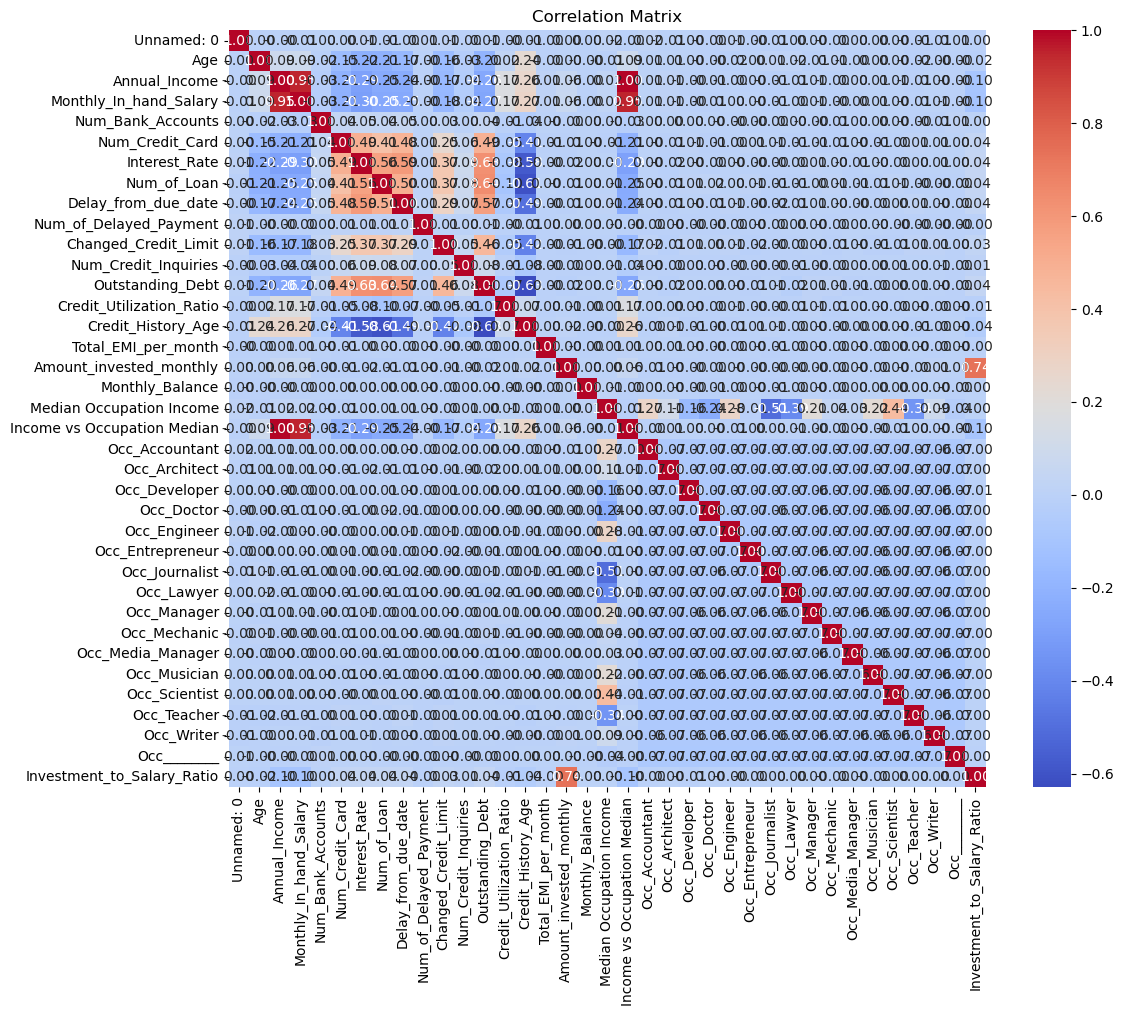

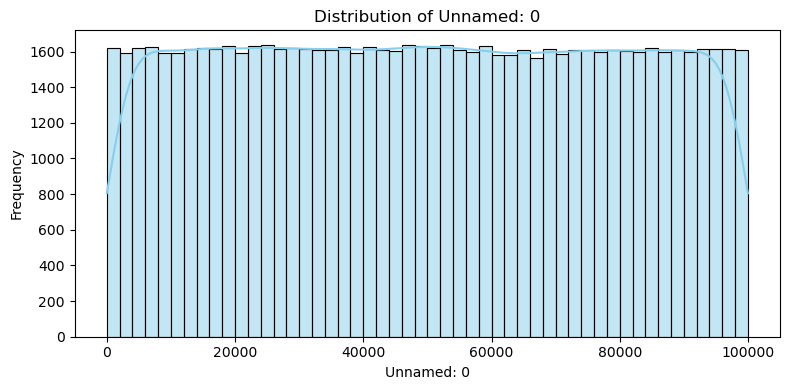

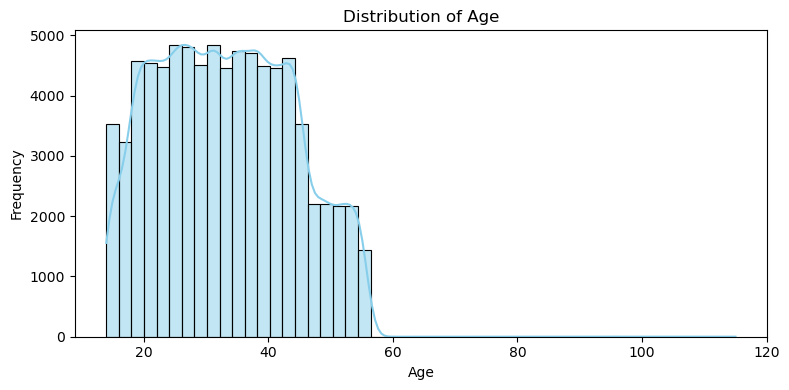

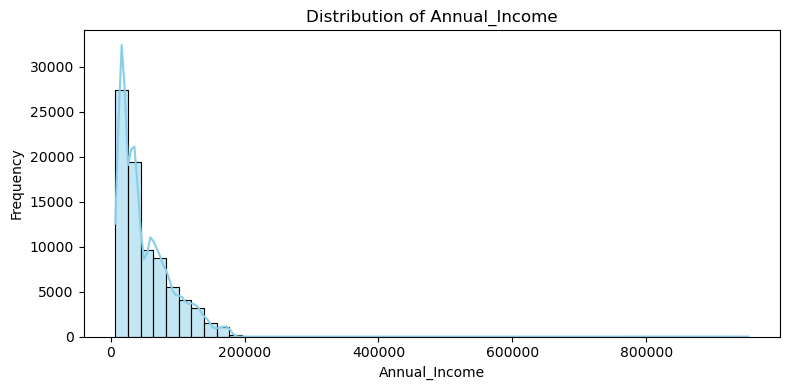

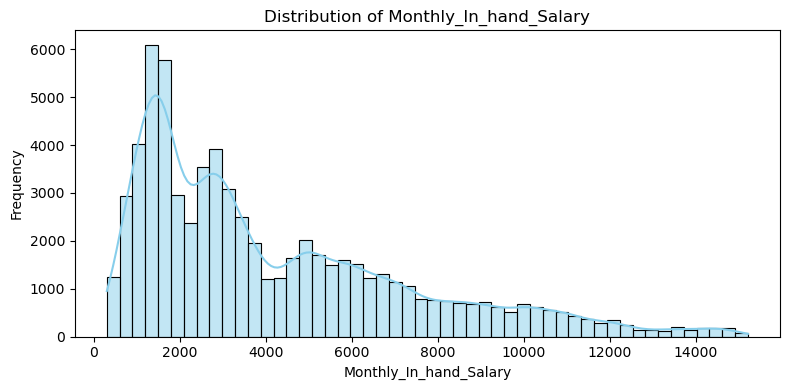

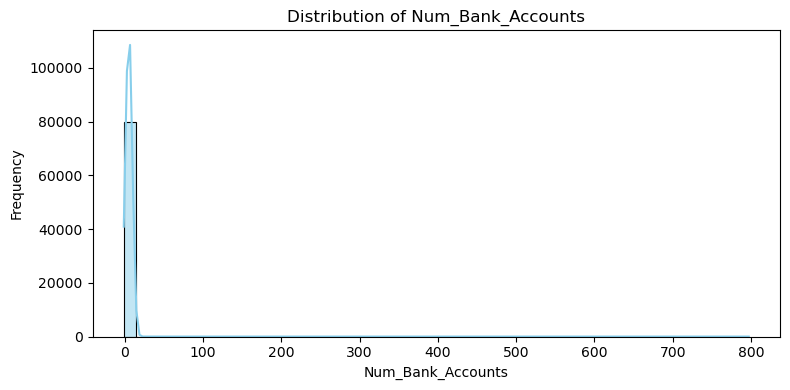

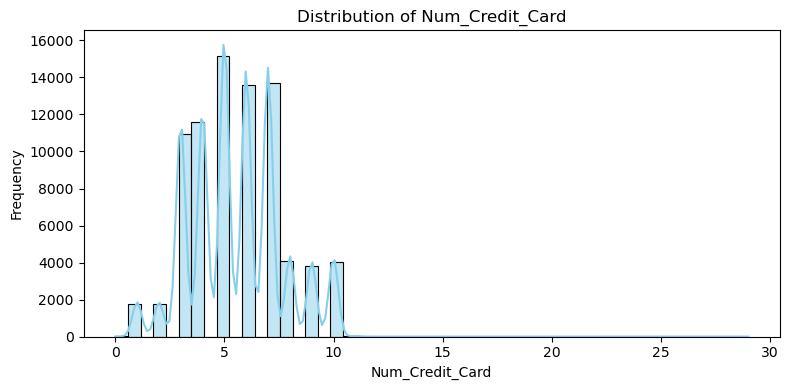

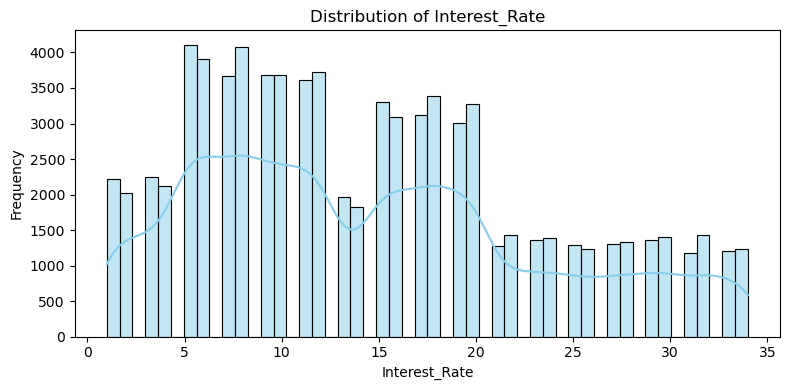

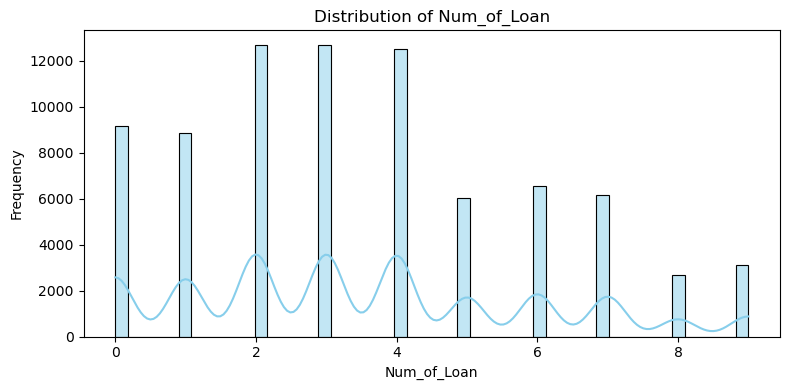

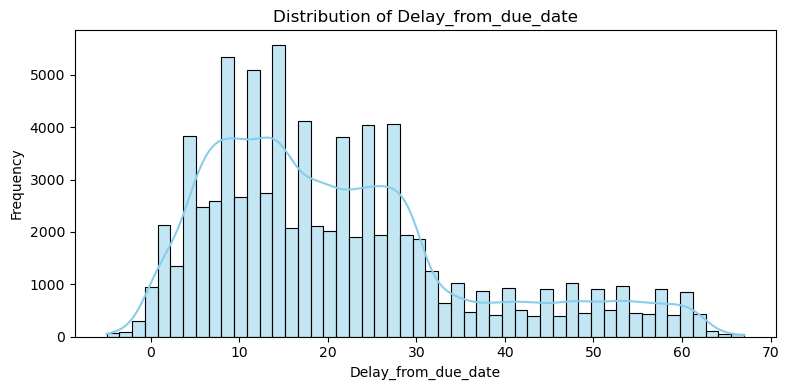

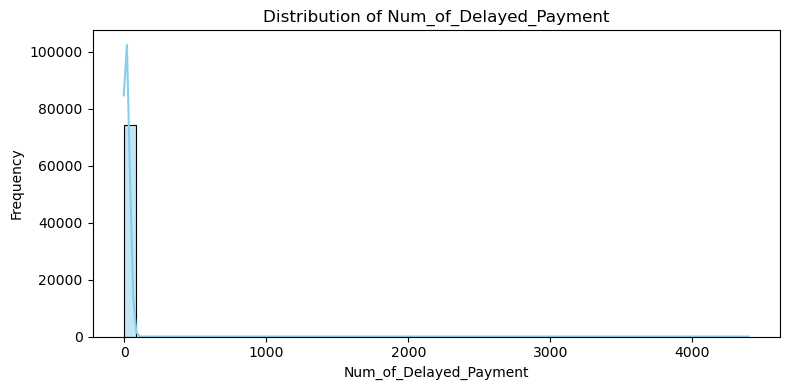

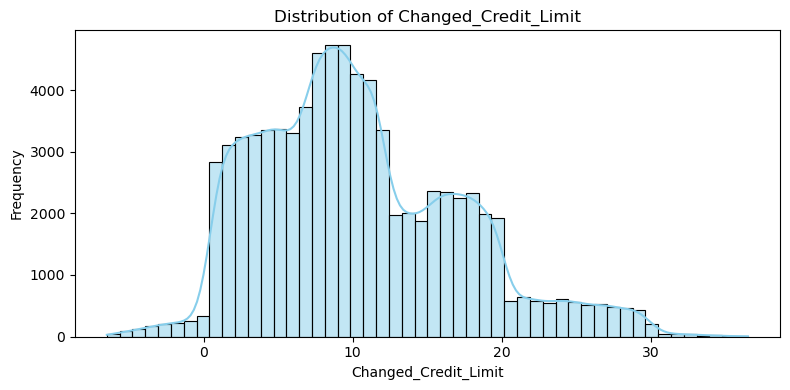

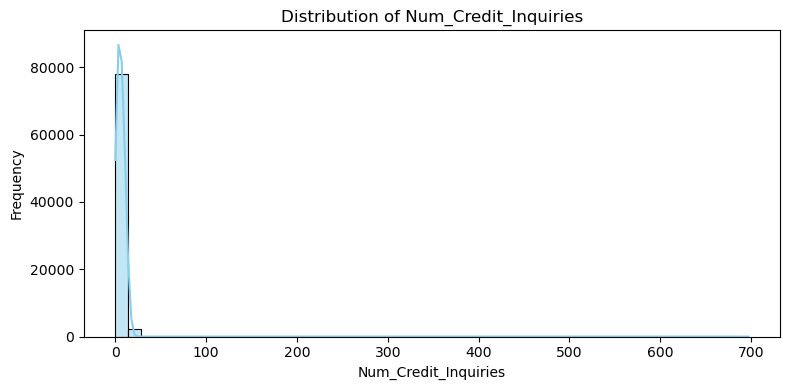

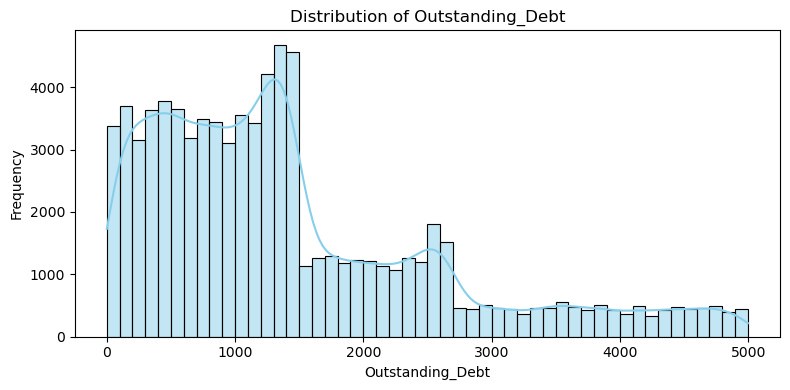

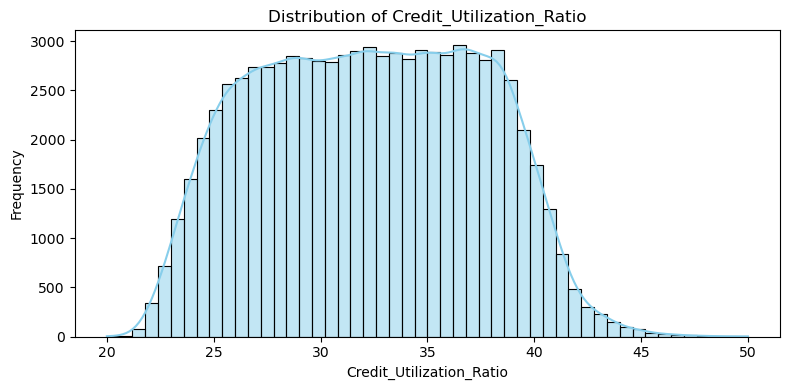

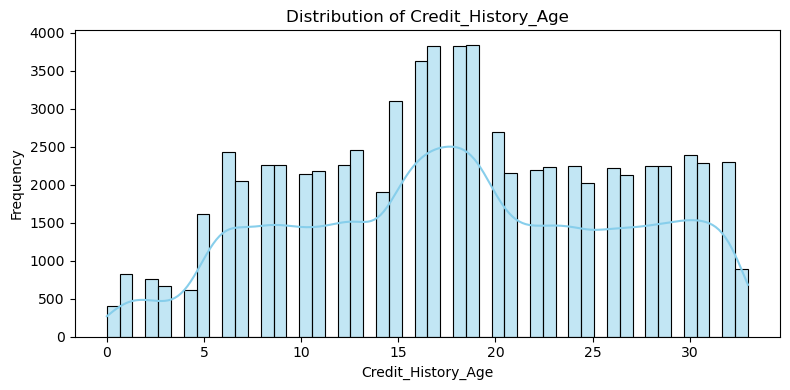

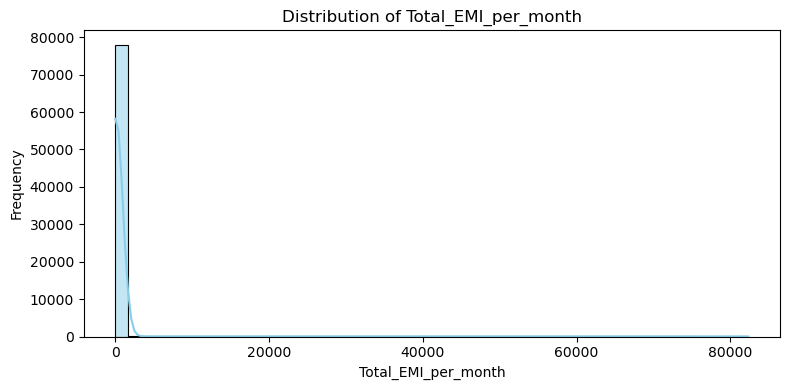

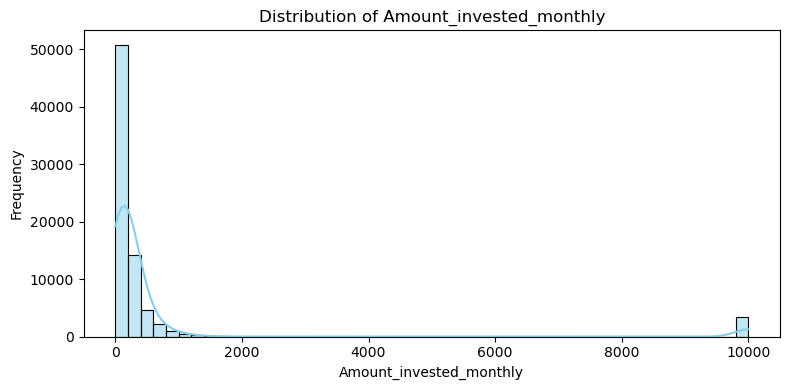

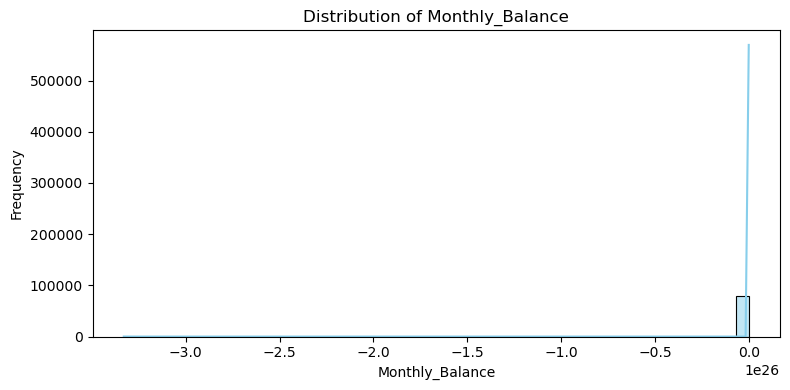

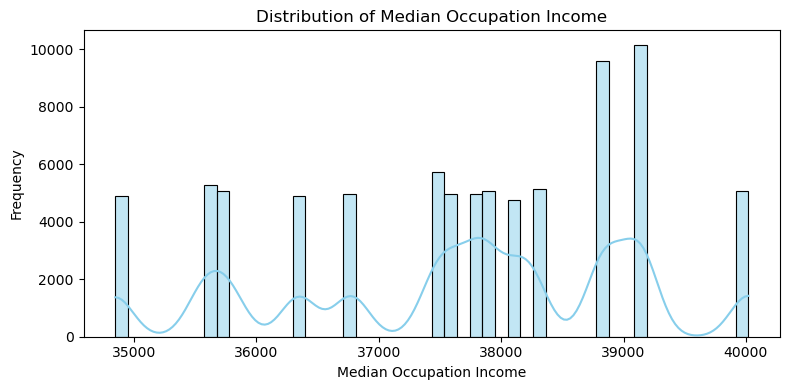

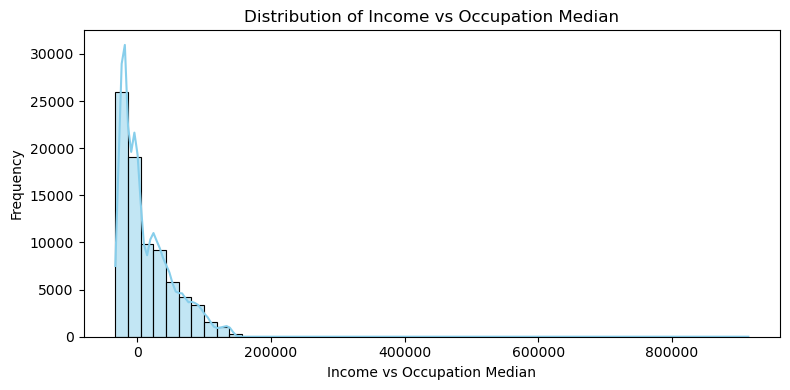

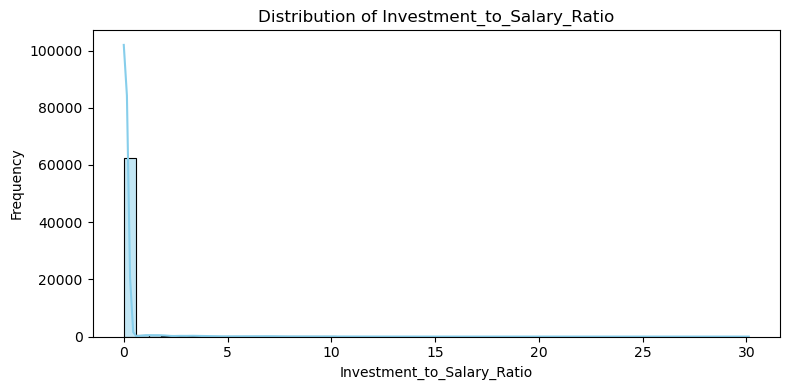

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC550 Data Mining\\Project\\train_clean.csv"
df = pd.read_csv(file_path)

# Optional: Display basic info
print("Dataset Info:")

print(df.info())
print("\nFirst few rows:")
print(df.head())

# --- Correlation Matrix (only for numeric columns) ---
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# --- Distribution Plots (only for numeric columns) ---
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


Will be starting at a random forest model

Confusion Matrix:
[[1275   10  602]
 [  61 2369  615]
 [ 456  675 4624]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1887
           1       0.78      0.78      0.78      3045
           2       0.79      0.80      0.80      5755

    accuracy                           0.77     10687
   macro avg       0.76      0.75      0.76     10687
weighted avg       0.77      0.77      0.77     10687



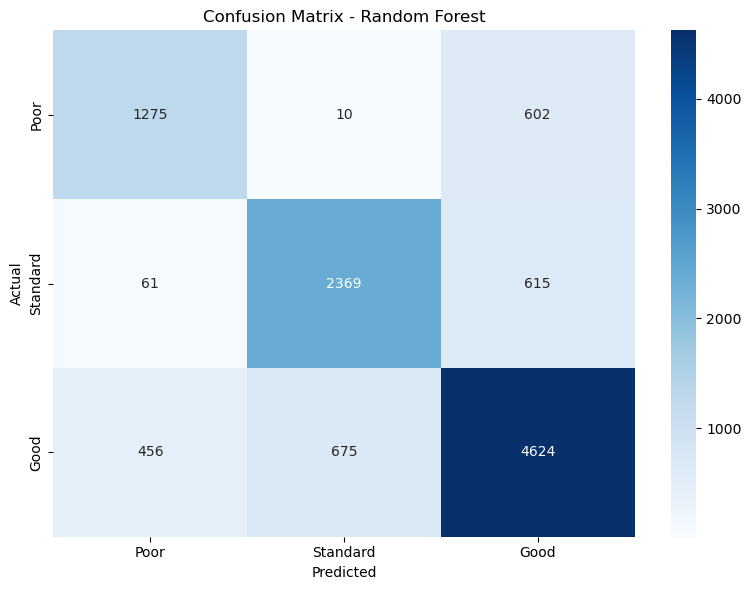

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the data
file_path = "C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC550 Data Mining\\Project\\train_clean.csv"
df = pd.read_csv(file_path)

# Filter out bad data
df = df[df['Annual_Income'] <= 1_000_000_000]

# Drop unneeded columns
df = df.drop(columns=['ID', 'Customer_ID', 'Month'])

# Handle categorical variables
label_cols = ['Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 
              'Occ_Accountant', 'Occ_Architect', 'Occ_Developer', 'Occ_Doctor', 'Occ_Engineer', 
              'Occ_Entrepreneur', 'Occ_Journalist', 'Occ_Lawyer', 'Occ_Manager', 'Occ_Mechanic', 
              'Occ_Media_Manager', 'Occ_Musician', 'Occ_Scientist', 'Occ_Teacher', 'Occ_Writer', 'Occ________']
for col in label_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
        df[col] = LabelEncoder().fit_transform(df[col])

# Drop remaining missing values
df = df.dropna()

# Define features and label
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


Hyperparameter Tuning using Optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'random_state': 42,
    }

    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_weighted')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=7)

print("Best hyperparameters:", study.best_trial.params)


[I 2025-06-01 21:19:58,382] A new study created in memory with name: no-name-aa62ceac-22d9-48b1-ac44-9d3cf8cef4db
[I 2025-06-01 21:20:10,354] Trial 0 finished with value: 0.6801825682319044 and parameters: {'n_estimators': 176, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'class_weight': None}. Best is trial 0 with value: 0.6801825682319044.
[I 2025-06-01 21:20:26,510] Trial 1 finished with value: 0.7135679606355646 and parameters: {'n_estimators': 126, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7135679606355646.
[I 2025-06-01 21:21:21,049] Trial 2 finished with value: 0.7456391515319498 and parameters: {'n_estimators': 310, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.7456391515319498.
[I 2025-06-01 21:22:44,880] Trial 3 finished with value:

Best hyperparameters: {'n_estimators': 310, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'class_weight': 'balanced'}


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = rf.estimators_[0]
plt.figure(figsize=(192,108))
plot_tree(tree, 
          feature_names=X.columns, 
          class_names=['Poor', 'Standard', 'Good'],
          filled=True, 
          rounded=True,
          max_depth=4)
plt.show()


Checking feature importance on all features in the model to eliminate ones with little impact

Top 10 important features:
Outstanding_Debt          0.096186
Interest_Rate             0.076774
Delay_from_due_date       0.053692
Changed_Credit_Limit      0.050715
Credit_Mix                0.049255
Unnamed: 0                0.042537
Num_of_Delayed_Payment    0.037198
Num_Credit_Card           0.037110
Credit_History_Age        0.036893
Monthly_Balance           0.036754
dtype: float64


C:\Users\champ\AppData\Local\Temp\ipykernel_24252\2959750916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.head(20), y=feat_importances.head(20).index, palette='viridis')


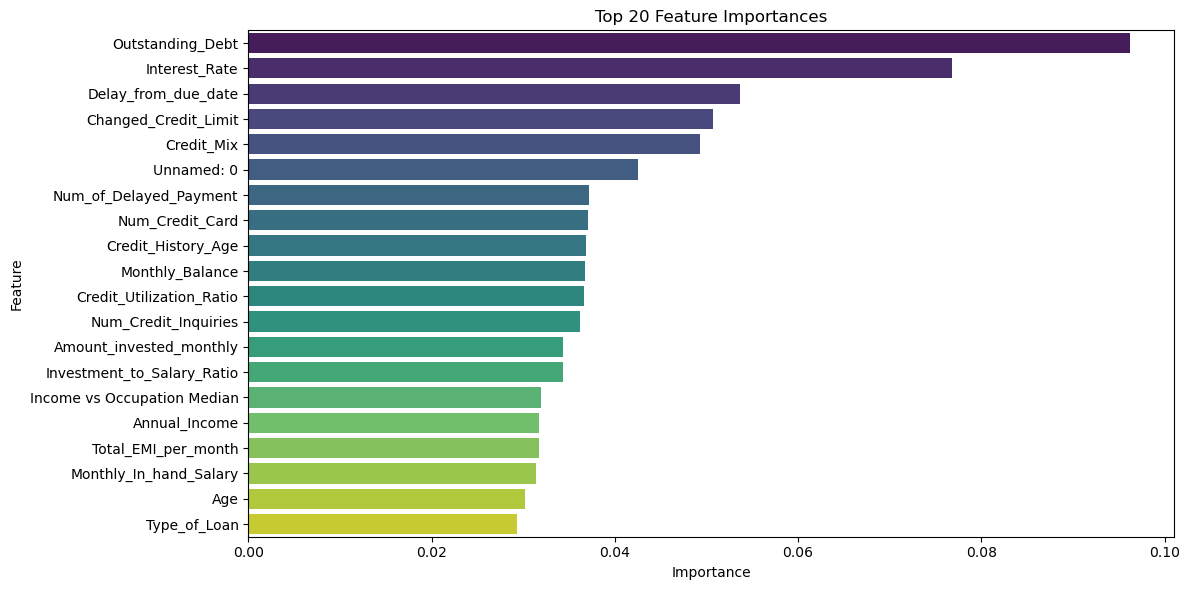

In [ ]:
# Get feature importances from the trained random forest
importances = rf.feature_importances_

# Create a pandas Series for better visualization
feat_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Print top 10 important features
print("Top 10 important features:")
print(feat_importances.head(10))

# Plot top 20 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances.head(20), y=feat_importances.head(20).index, palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Running model with the hyperparameters from optuna

Confusion Matrix:
[[1493   21  373]
 [ 232 2416  397]
 [ 896  753 4106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.79      0.66      1887
           1       0.76      0.79      0.77      3045
           2       0.84      0.71      0.77      5755

    accuracy                           0.75     10687
   macro avg       0.72      0.77      0.74     10687
weighted avg       0.77      0.75      0.75     10687



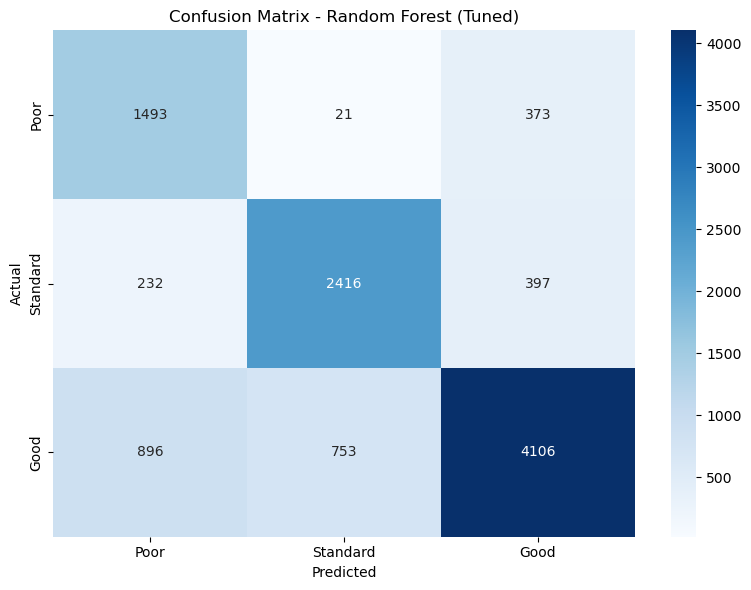

In [ ]:
# Load the data
file_path = "C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC550 Data Mining\\Project\\train_clean.csv"
df = pd.read_csv(file_path)

# Filter out bad data
df = df[df['Annual_Income'] <= 1_000_000_000]

# Drop unneeded columns
df = df.drop(columns=['ID', 'Customer_ID', 'Month'])

# Handle categorical variables
label_cols = ['Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 
              'Occ_Accountant', 'Occ_Architect', 'Occ_Developer', 'Occ_Doctor', 'Occ_Engineer', 
              'Occ_Entrepreneur', 'Occ_Journalist', 'Occ_Lawyer', 'Occ_Manager', 'Occ_Mechanic', 
              'Occ_Media_Manager', 'Occ_Musician', 'Occ_Scientist', 'Occ_Teacher', 'Occ_Writer', 'Occ________']
for col in label_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
        df[col] = LabelEncoder().fit_transform(df[col])

# Drop remaining missing values
df = df.dropna()

# Define features and label
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with best hyperparameters from Optuna
rf = RandomForestClassifier(
    n_estimators=310,
    max_depth=22,
    min_samples_split=4,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Poor', 'Standard', 'Good'], 
            yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.tight_layout()
plt.show()


Top 10 important features:
Outstanding_Debt         0.112961
Interest_Rate            0.107503
Delay_from_due_date      0.070114
Credit_Mix               0.058488
Payment_of_Min_Amount    0.050796
Num_Credit_Inquiries     0.048717
Changed_Credit_Limit     0.045117
Credit_History_Age       0.041812
Num_Bank_Accounts        0.036521
Num_Credit_Card          0.035192
dtype: float64


C:\Users\champ\AppData\Local\Temp\ipykernel_24252\2959750916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.head(20), y=feat_importances.head(20).index, palette='viridis')


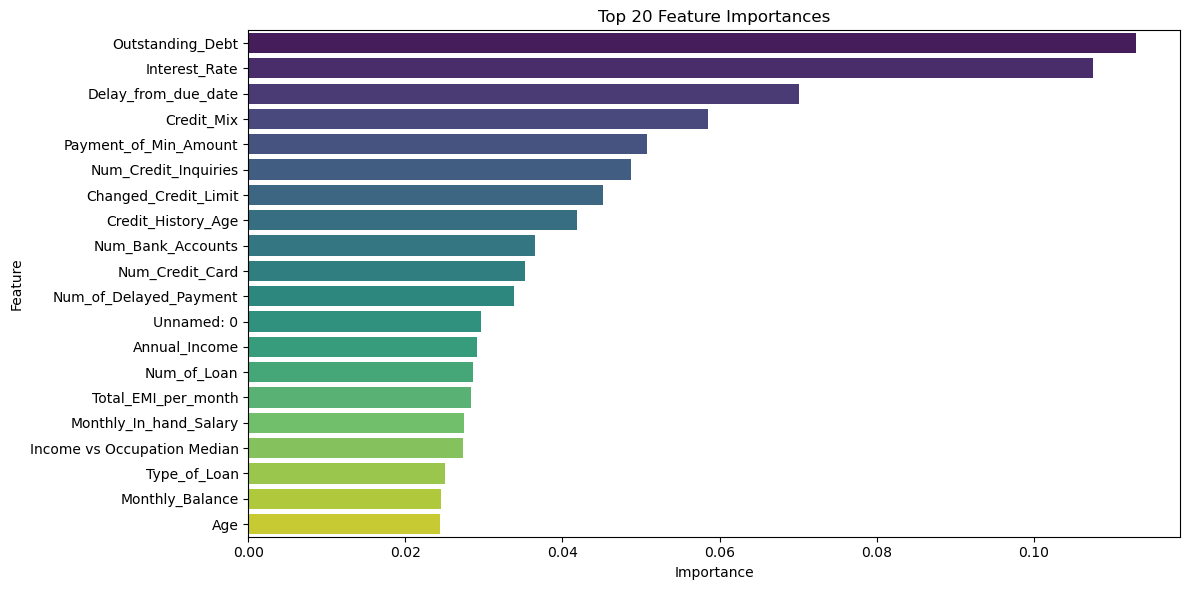

In [ ]:
# Get feature importances from the trained random forest
importances = rf.feature_importances_

# Create a pandas Series for better visualization
feat_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Print top 10 important features
print("Top 10 important features:")
print(feat_importances.head(10))

# Plot top 20 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances.head(20), y=feat_importances.head(20).index, palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
# Load the test data
test_file_path = "C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC550 Data Mining\\Project\\test.csv"
df_test = pd.read_csv(test_file_path)

# Apply the same filters and preprocessing as training data
df_test = df_test[df_test['Annual_Income'] <= 1_000_000_000]
df_test = df_test.drop(columns=['ID', 'Customer_ID', 'Month'])

# Handle categorical variables in test data
label_cols = ['Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 
              'Occ_Accountant', 'Occ_Architect', 'Occ_Developer', 'Occ_Doctor', 'Occ_Engineer', 
              'Occ_Entrepreneur', 'Occ_Journalist', 'Occ_Lawyer', 'Occ_Manager', 'Occ_Mechanic', 
              'Occ_Media_Manager', 'Occ_Musician', 'Occ_Scientist', 'Occ_Teacher', 'Occ_Writer', 'Occ________']

for col in label_cols:
    if col in df_test.columns:
        if df_test[col].dtype == 'object':
            df_test[col] = df_test[col].fillna("Unknown")
            # Use the same LabelEncoder from train? 
            # Since you used LabelEncoder separately, 
            # you should fit on train, then transform test to keep consistent.
            # But for simplicity here, let's fit-transform:
            df_test[col] = LabelEncoder().fit_transform(df_test[col])
    else:
        # If column is missing in test, create it with zeros (assuming it's a flag)
        df_test[col] = 0

# Drop missing values if any
df_test = df_test.dropna()

# Separate features and label in test data
X_final_test = df_test.drop(columns=['Credit_Score'])
y_final_test = df_test['Credit_Score']

# Predict on test data using the trained Random Forest
y_test_pred = rf.predict(X_final_test)

# Evaluate performance on test data
cm_test = confusion_matrix(y_final_test, y_test_pred)
print("Confusion Matrix on Test Dataset:")
print(cm_test)
print("\nClassification Report on Test Dataset:")
print(classification_report(y_final_test, y_test_pred))

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Poor', 'Standard', 'Good'], 
            yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Test Dataset)')
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined